In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [3]:
plt.rc('font', family='Malgun Gothic')

In [4]:
df=pd.read_csv("./데이터/아파트 가격/2022실거래가_처리후.csv",encoding="cp949")

In [10]:
df.tail()

,계약일자,구,동,번지,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형
10612,20220327,중랑구,중화동,450,450.0,0.0,한신아파트(103~109),59.76,73000,20,1997.0,동일로 752,NaN,중개거래
10613,20220720,중랑구,중화동,450,450.0,0.0,한신아파트(103~109),59.76,74000,3,1997.0,동일로 752,NaN,중개거래
10614,20220727,중랑구,중화동,450,450.0,0.0,한신아파트(103~109),84.03,91500,12,1997.0,동일로 752,NaN,중개거래
10615,20220409,중랑구,중화동,274-51,274.0,51.0,한영(101),84.69,49900,7,2003.0,동일로144길 74,NaN,중개거래
10616,20220423,중랑구,중화동,11월 07일,11.0,7.0,현대휴앤미(102동),76.43,53000,6,2007.0,봉화산로27가길 19,NaN,중개거래


In [30]:
df_remod = pd.read_csv("./데이터/동별 건폐율 용적율.csv",encoding="cp949")

In [33]:
df_remod = df_remod.drop(columns=["건축물대장 관리번호", "시군구_코드"])

In [52]:
df_remod

,건폐율,용적율,법정동_코드
0,30.56,54.81,부암동
1,57.11,274.41,동숭동
2,72.98,72.98,팔판동
3,42.09,149.47,대신동
4,56.87,170.62,숭인동
...,...,...,...
10634,59.90,152.94,봉천동
10635,48.61,45.60,진관동
10636,54.50,54.50,공릉동
10637,57.35,151.29,불광동


In [43]:
df_metro = pd.read_csv("./데이터/동별지하철역.csv",encoding="cp949")
df_metro

,시군구코드,시군구명,읍면동코드,읍면동명,지하철역명,개수
0,1111000000,종로구,1111016100,종로4가,종로5가,1
1,1111000000,종로구,1111016300,종로5가,종로5가,1
2,1111000000,종로구,1111015100,묘동,종로3가,1
3,1111000000,종로구,1111012300,서린동,종각,1
4,1111000000,종로구,1111017700,평동,서대문,1
...,...,...,...,...,...,...
509,1174000000,강동구,1174010900,천호동,암사,4
510,1174000000,강동구,1174010900,천호동,굽은다리(강동구민회관앞),4
511,1174000000,강동구,1174010900,천호동,강동,4
512,1174000000,강동구,1174011000,강일동,강일,1


In [51]:
df_metro = df_metro[["읍면동명", "개수"]]

In [63]:
df_metro

,읍면동명,개수
0,종로4가,1
1,종로5가,1
2,묘동,1
3,서린동,1
4,평동,1
...,...,...
509,천호동,4
510,천호동,4
511,천호동,4
512,강일동,1


In [64]:
merge_df=pd.merge(test, df_metro,left_on="읍면동명",right_on="읍면동명",how='inner')
merge_df

,읍면동명,통계년월,만0-9세,만10-19세,만20-29세,만30-39세,만40-49세,만50-59세,만60-69세,만70세이상,개수
0,적선동,2022-08-22,3,1,1,7,4,6,9,5,1
1,적선동,2022-07-31,3,1,1,7,4,7,8,4,1
2,적선동,2022-06-30,3,1,1,8,4,7,9,4,1
3,적선동,2022-05-31,3,1,1,8,4,7,9,5,1
4,적선동,2022-04-30,3,1,2,7,4,7,9,6,1
...,...,...,...,...,...,...,...,...,...,...,...
3636,세종로,2022-04-30,0,0,0,0,0,0,2,0,2
3637,세종로,2022-03-31,0,0,0,0,0,0,2,0,2
3638,세종로,2022-03-31,0,0,0,0,0,0,2,0,2
3639,세종로,2022-01-31,0,0,0,0,0,0,2,0,2


In [60]:
merge_df.groupby("동").mean()

,계약일자,전용면적(㎡),거래금액(만원),건축년도,개수
동,,,,,
가락동,2.022048e+07,69.256574,132852.912621,2006.456311,5.0
가리봉동,2.022046e+07,59.940000,49250.000000,1998.000000,1.0
가산동,2.022054e+07,24.901085,23517.066667,2010.946667,3.0
가양동,2.022054e+07,53.682554,76742.857143,1994.800000,4.0
갈현동,2.022055e+07,63.265083,43237.500000,2001.166667,2.0
...,...,...,...,...,...
회현동1가,2.022062e+07,106.054000,131500.000000,2002.500000,1.0
효창동,2.022064e+07,84.496000,133440.000000,2005.800000,1.0
휘경동,2.022048e+07,63.295143,75928.571429,2006.142857,1.0


<AxesSubplot:title={'center':'연령별 인구와 지하철 수의 상관관계'}>

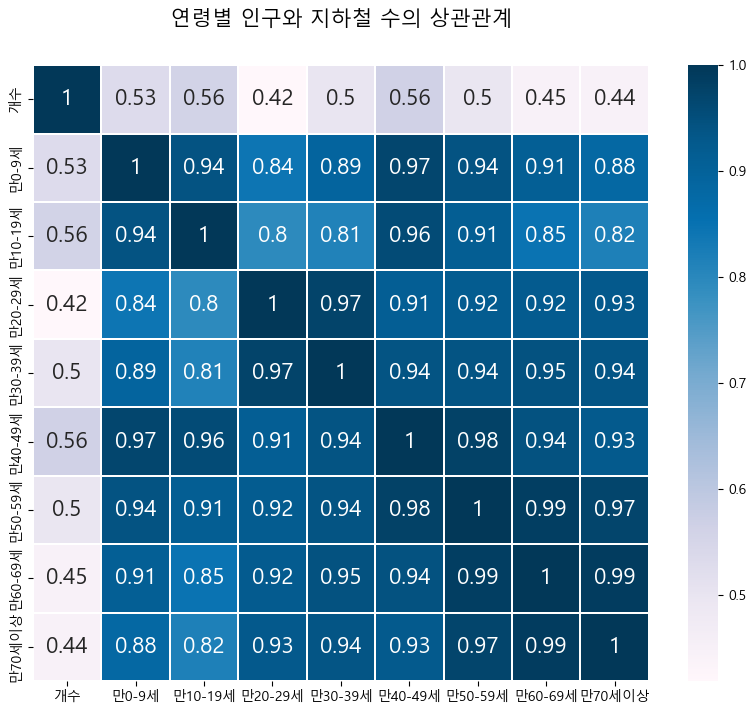

In [65]:
heatmap_data=merge_df[["개수", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("연령별 인구와 지하철 수의 상관관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [58]:
price_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도
9979,20220101,중구,신당동,18.0800,14000,2014.0
2623,20220101,구로구,구로동,38.9600,21000,1997.0
10018,20220101,중구,오장동,14.3700,25000,2020.0
4475,20220101,도봉구,창동,49.9400,75500,1990.0
7047,20220101,성동구,응봉동,75.5100,144000,1986.0
...,...,...,...,...,...,...
10136,20221031,중랑구,망우동,83.6100,50000,2002.0
1563,20221031,강서구,방화동,84.0164,38000,2002.0
9198,20221031,용산구,한강로1가,99.8500,160000,2005.0
9016,20221031,영등포구,영등포동4가,12.1000,12950,2012.0


In [5]:
df=df[["계약일자","구","동","전용면적(㎡)","거래금액(만원)","건축년도"]]

In [6]:
price_df=df

In [7]:
price_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도
0,20220412,강남구,개포동,79.97,220000,1987.0
1,20220421,강남구,개포동,79.97,220000,1987.0
2,20220527,강남구,개포동,79.97,216000,1987.0
3,20220401,강남구,개포동,102.32,369000,2020.0
4,20220502,강남구,개포동,136.06,420000,2020.0
...,...,...,...,...,...,...
10612,20220327,중랑구,중화동,59.76,73000,1997.0
10613,20220720,중랑구,중화동,59.76,74000,1997.0
10614,20220727,중랑구,중화동,84.03,91500,1997.0
10615,20220409,중랑구,중화동,84.69,49900,2003.0


In [8]:
price_df.sort_values(by="계약일자",ascending=True,inplace=True)

In [9]:
price_df1=price_df[round(price_df["계약일자"],-2)/100==202201]
price_df2=price_df[round(price_df["계약일자"],-2)/100==202202]
price_df3=price_df[round(price_df["계약일자"],-2)/100==202203]
price_df4=price_df[round(price_df["계약일자"],-2)/100==202204]
price_df5=price_df[round(price_df["계약일자"],-2)/100==202205]
price_df6=price_df[round(price_df["계약일자"],-2)/100==202206]
price_df7=price_df[round(price_df["계약일자"],-2)/100==202207]
price_df8=price_df[round(price_df["계약일자"],-2)/100==202208]
price_df9=price_df[round(price_df["계약일자"],-2)/100==202209]
price_df10=price_df[round(price_df["계약일자"],-2)/100==202210]

In [10]:
df=pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수 합.csv")

In [11]:
df["통계년월"].unique()

array(['2022-10-31', '2022-09-30', '2022-08-22', '2022-07-31',
       '2022-06-30', '2022-05-31', '2022-04-30', '2022-03-31',
       '2022-01-31'], dtype=object)

In [12]:
population_df=pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수 합.csv")

In [16]:
population_df

,시도명,시군구명,읍면동명,계,남자,여자,통계년월,만0-4세남자,만5-9세남자,만10-14세남자,...,만25-29세여자,만30-34세여자,만35-39세여자,만40-44세여자,만45-49세여자,만50-54세여자,만55-59세여자,만60-64세여자,만65-69세여자,만70세이상여자
0,서울특별시,종로구,청운동,2339,1168,1171,2022-10-31,29,74,86,...,52,68,67,113,120,102,105,74,72,159
1,서울특별시,종로구,신교동,1381,618,763,2022-10-31,11,21,46,...,45,44,47,80,87,74,54,47,36,96
2,서울특별시,종로구,궁정동,199,84,115,2022-10-31,1,5,2,...,12,11,6,11,15,16,5,3,4,9
3,서울특별시,종로구,효자동,569,251,318,2022-10-31,7,8,5,...,21,25,28,20,29,26,35,27,12,38
4,서울특별시,종로구,창성동,436,181,255,2022-10-31,4,10,5,...,11,20,23,27,15,28,15,20,14,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,서울특별시,강동구,둔촌동,24760,12212,12548,2022-01-31,366,514,506,...,913,922,864,923,919,1099,1021,1143,886,1388
4115,서울특별시,강동구,암사동,67598,33228,34370,2022-01-31,1096,1523,1427,...,2329,2356,2693,2825,2641,2932,2631,2807,2256,3858
4116,서울특별시,강동구,성내동,66439,32492,33947,2022-01-31,853,1047,1078,...,3197,2757,2546,2538,2538,2838,2653,2902,2380,3887
4117,서울특별시,강동구,천호동,86351,42290,44061,2022-01-31,1077,1088,1077,...,4535,4071,3225,3039,2999,3435,3506,3920,3151,5541


In [23]:
population_df.iloc[:, 6:]

,통계년월,만0-4세남자,만5-9세남자,만10-14세남자,만15-19세남자,만20-24세남자,만25-29세남자,만30-34세남자,만35-39세남자,만40-44세남자,...,만25-29세여자,만30-34세여자,만35-39세여자,만40-44세여자,만45-49세여자,만50-54세여자,만55-59세여자,만60-64세여자,만65-69세여자,만70세이상여자
0,2022-10-31,29,74,86,91,86,77,65,53,81,...,52,68,67,113,120,102,105,74,72,159
1,2022-10-31,11,21,46,41,42,51,32,32,50,...,45,44,47,80,87,74,54,47,36,96
2,2022-10-31,1,5,2,5,13,3,2,4,10,...,12,11,6,11,15,16,5,3,4,9
3,2022-10-31,7,8,5,17,15,20,14,18,12,...,21,25,28,20,29,26,35,27,12,38
4,2022-10-31,4,10,5,8,8,8,12,11,19,...,11,20,23,27,15,28,15,20,14,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,2022-01-31,366,514,506,564,743,933,911,925,959,...,913,922,864,923,919,1099,1021,1143,886,1388
4115,2022-01-31,1096,1523,1427,1405,1913,2415,2278,2686,2895,...,2329,2356,2693,2825,2641,2932,2631,2807,2256,3858
4116,2022-01-31,853,1047,1078,1307,1877,2951,2879,2589,2563,...,3197,2757,2546,2538,2538,2838,2653,2902,2380,3887
4117,2022-01-31,1077,1088,1077,1321,2196,3744,4046,3560,3276,...,4535,4071,3225,3039,2999,3435,3506,3920,3151,5541


In [26]:
test = pd.concat([population_df.iloc[:, 2:3], population_df.iloc[:, 6:]], axis=1)

In [27]:
test

,읍면동명,통계년월,만0-4세남자,만5-9세남자,만10-14세남자,만15-19세남자,만20-24세남자,만25-29세남자,만30-34세남자,만35-39세남자,...,만25-29세여자,만30-34세여자,만35-39세여자,만40-44세여자,만45-49세여자,만50-54세여자,만55-59세여자,만60-64세여자,만65-69세여자,만70세이상여자
0,청운동,2022-10-31,29,74,86,91,86,77,65,53,...,52,68,67,113,120,102,105,74,72,159
1,신교동,2022-10-31,11,21,46,41,42,51,32,32,...,45,44,47,80,87,74,54,47,36,96
2,궁정동,2022-10-31,1,5,2,5,13,3,2,4,...,12,11,6,11,15,16,5,3,4,9
3,효자동,2022-10-31,7,8,5,17,15,20,14,18,...,21,25,28,20,29,26,35,27,12,38
4,창성동,2022-10-31,4,10,5,8,8,8,12,11,...,11,20,23,27,15,28,15,20,14,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,둔촌동,2022-01-31,366,514,506,564,743,933,911,925,...,913,922,864,923,919,1099,1021,1143,886,1388
4115,암사동,2022-01-31,1096,1523,1427,1405,1913,2415,2278,2686,...,2329,2356,2693,2825,2641,2932,2631,2807,2256,3858
4116,성내동,2022-01-31,853,1047,1078,1307,1877,2951,2879,2589,...,3197,2757,2546,2538,2538,2838,2653,2902,2380,3887
4117,천호동,2022-01-31,1077,1088,1077,1321,2196,3744,4046,3560,...,4535,4071,3225,3039,2999,3435,3506,3920,3151,5541


In [26]:
join_df=pd.merge(price_df, test,left_on="동",right_on="읍면동명",how='inner')
join_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도,읍면동명,통계년월,만0-9세,만10-19세,만20-29세,만30-39세,만40-49세,만50-59세,만60-69세,만70세이상
0,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-08-22,3390,3970,9516,10377,9522,11916,10548,9915
1,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-07-31,3381,3999,9549,10400,9592,11974,10540,9898
2,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-06-30,3405,4008,9584,10361,9624,11996,10513,9855
3,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-05-31,3417,4019,9616,10344,9646,12030,10521,9828
4,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-04-30,3431,4032,9672,10358,9683,12055,10547,9745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75571,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-06-30,44,65,187,158,148,174,103,112
75572,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-05-31,47,64,184,160,145,174,102,113
75573,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-04-30,47,65,180,161,152,170,102,115
75574,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-03-31,44,65,185,159,152,172,105,115


<AxesSubplot:title={'center':'2022년 연령별 인구와 거래금액의 상관 관계'}>

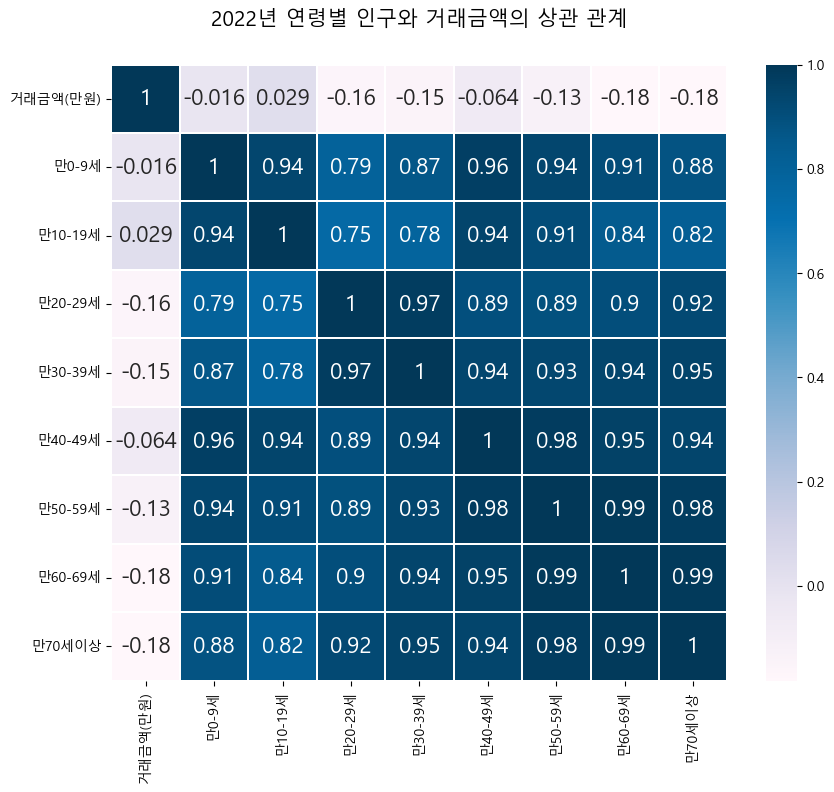

In [28]:
heatmap_data=join_df[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("2022년 연령별 인구와 거래금액의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [19]:
join_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도,시도명,시군구명,읍면동명,계,...,만60-69세남자,만70세이상남자,만0-9세여자,만10-19세여자,만20-29세여자,만30-39세여자,만40-49세여자,만50-59세여자,만60-69세여자,만70세이상여자
0,20220101,중구,신당동,18.080,14000,2014.0,서울특별시,중구,신당동,69154,...,5073,4025,1674,1957,4986,5215,4725,6054,5475,5890
1,20220101,중구,신당동,18.080,14000,2014.0,서울특별시,중구,신당동,69333,...,5065,4015,1661,1976,5004,5237,4772,6074,5475,5883
2,20220101,중구,신당동,18.080,14000,2014.0,서울특별시,중구,신당동,69346,...,5035,4002,1667,1988,5018,5217,4787,6066,5478,5853
3,20220101,중구,신당동,18.080,14000,2014.0,서울특별시,중구,신당동,69421,...,5039,3991,1680,1994,5043,5202,4791,6088,5482,5837
4,20220101,중구,신당동,18.080,14000,2014.0,서울특별시,중구,신당동,69523,...,5042,3957,1672,2006,5090,5181,4792,6098,5505,5788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75571,20220919,성북구,보문동4가,82.028,70000,2011.0,서울특별시,성북구,보문동4가,991,...,44,50,22,35,89,73,81,77,59,62
75572,20220919,성북구,보문동4가,82.028,70000,2011.0,서울특별시,성북구,보문동4가,989,...,42,50,23,34,88,73,78,76,60,63
75573,20220919,성북구,보문동4가,82.028,70000,2011.0,서울특별시,성북구,보문동4가,992,...,42,50,23,33,87,73,81,74,60,65
75574,20220919,성북구,보문동4가,82.028,70000,2011.0,서울특별시,성북구,보문동4가,997,...,44,50,21,33,92,69,81,76,61,65


In [28]:
df["통계년월"].unique()

array(['2022-10-31', '2022-09-30', '2022-08-22', '2022-07-31',
       '2022-06-30', '2022-05-31', '2022-04-30', '2022-03-31',
       '2022-01-31'], dtype=object)

In [29]:
df1=df[df["통계년월"]=="2022-01-31"]
df2=df[df["통계년월"]=="2022-01-31"]
df3=df[df["통계년월"]=="2022-03-31"]
df4=df[df["통계년월"]=="2022-04-30"]
df5=df[df["통계년월"]=="2022-05-31"]
df6=df[df["통계년월"]=="2022-06-30"]
df7=df[df["통계년월"]=="2022-07-31"]
df8=df[df["통계년월"]=="2022-08-22"]
df9=df[df["통계년월"]=="2022-09-30"]
df10=df[df["통계년월"]=="2022-10-31"]

In [32]:
df1=df1[["읍면동명","계"]]
df2=df2[["읍면동명","계"]]
df3=df3[["읍면동명","계"]]
df4=df4[["읍면동명","계"]]
df5=df5[["읍면동명","계"]]
df6=df6[["읍면동명","계"]]
df7=df7[["읍면동명","계"]]
df8=df8[["읍면동명","계"]]
df9=df9[["읍면동명","계"]]
df10=df10[["읍면동명","계"]]

In [33]:
df10

,읍면동명,계
0,청운동,2314
1,신교동,1397
2,궁정동,252
3,효자동,574
4,창성동,446
...,...,...
452,둔촌동,24474
453,암사동,66813
454,성내동,66063
455,천호동,86105


In [34]:
join_df1=pd.merge(price_df1,df1,left_on="동",right_on="읍면동명",how='inner')
join_df2=pd.merge(price_df2,df2,left_on="동",right_on="읍면동명",how='inner')
join_df3=pd.merge(price_df3,df3,left_on="동",right_on="읍면동명",how='inner')
join_df4=pd.merge(price_df4,df4,left_on="동",right_on="읍면동명",how='inner')
join_df5=pd.merge(price_df5,df5,left_on="동",right_on="읍면동명",how='inner')
join_df6=pd.merge(price_df6,df6,left_on="동",right_on="읍면동명",how='inner')
join_df7=pd.merge(price_df7,df7,left_on="동",right_on="읍면동명",how='inner')
join_df8=pd.merge(price_df8,df8,left_on="동",right_on="읍면동명",how='inner')
join_df9=pd.merge(price_df9,df9,left_on="동",right_on="읍면동명",how='inner')
join_df10=pd.merge(price_df10,df10,left_on="동",right_on="읍면동명",how='inner')

In [35]:
join_df1=join_df1[["계약일자","구","동","거래금액(만원)","계"]]
join_df2=join_df2[["계약일자","구","동","거래금액(만원)","계"]]
join_df3=join_df3[["계약일자","구","동","거래금액(만원)","계"]]
join_df4=join_df4[["계약일자","구","동","거래금액(만원)","계"]]
join_df5=join_df5[["계약일자","구","동","거래금액(만원)","계"]]
join_df6=join_df6[["계약일자","구","동","거래금액(만원)","계"]]
join_df7=join_df7[["계약일자","구","동","거래금액(만원)","계"]]
join_df8=join_df8[["계약일자","구","동","거래금액(만원)","계"]]
join_df9=join_df9[["계약일자","구","동","거래금액(만원)","계"]]
join_df10=join_df10[["계약일자","구","동","거래금액(만원)","계"]]

In [36]:
join_df1.rename(columns={"계":"인구"},inplace=True)
join_df2.rename(columns={"계":"인구"},inplace=True)
join_df3.rename(columns={"계":"인구"},inplace=True)
join_df4.rename(columns={"계":"인구"},inplace=True)
join_df5.rename(columns={"계":"인구"},inplace=True)
join_df6.rename(columns={"계":"인구"},inplace=True)
join_df7.rename(columns={"계":"인구"},inplace=True)
join_df8.rename(columns={"계":"인구"},inplace=True)
join_df9.rename(columns={"계":"인구"},inplace=True)
join_df10.rename(columns={"계":"인구"},inplace=True)

In [37]:
join_df1

,계약일자,구,동,거래금액(만원),인구
0,20220101,중구,신당동,14000,69816
1,20220104,중구,신당동,16000,69816
2,20220113,중구,신당동,23400,69816
3,20220114,중구,신당동,15000,69816
4,20220126,중구,신당동,20800,69816
...,...,...,...,...,...
1144,20220126,서대문구,냉천동,90500,3031
1145,20220127,중구,묵정동,59500,880
1146,20220128,영등포구,도림동,135000,17727
1147,20220129,용산구,문배동,15500,5719


In [126]:
heatmap_data1=join_df1[["계약일자","거래금액(만원)","인구"]]
heatmap_data2=join_df2[["계약일자","거래금액(만원)","인구"]]
heatmap_data3=join_df3[["계약일자","거래금액(만원)","인구"]]
heatmap_data4=join_df4[["계약일자","거래금액(만원)","인구"]]
heatmap_data5=join_df5[["계약일자","거래금액(만원)","인구"]]
heatmap_data6=join_df6[["계약일자","거래금액(만원)","인구"]]
heatmap_data7=join_df7[["계약일자","거래금액(만원)","인구"]]
heatmap_data8=join_df8[["계약일자","거래금액(만원)","인구"]]

In [128]:
price = pd.Series([heatmap_data1["거래금액(만원)"].mean(), heatmap_data2["거래금액(만원)"].mean(),
                  heatmap_data3["거래금액(만원)"].mean(), heatmap_data4["거래금액(만원)"].mean(),
                  heatmap_data5["거래금액(만원)"].mean(), heatmap_data6["거래금액(만원)"].mean(),
                  heatmap_data7["거래금액(만원)"].mean(), heatmap_data8["거래금액(만원)"].mean()])

In [129]:
population = pd.Series([heatmap_data1["인구"].mean(), heatmap_data2["인구"].mean(),
                  heatmap_data3["인구"].mean(), heatmap_data4["인구"].mean(),
                  heatmap_data5["인구"].mean(), heatmap_data6["인구"].mean(),
                  heatmap_data7["인구"].mean(), heatmap_data8["인구"].mean()])

In [130]:
time = pd.Series([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208])

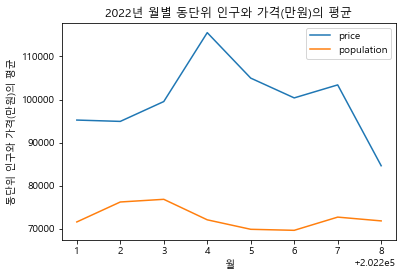

In [131]:
plt.plot(time, price, label='price')
plt.plot(time, population, label='population')
plt.xlabel('월')
plt.ylabel('동단위 인구와 가격(만원)의 평균')
plt.legend()
plt.title('2022년 월별 동단위 인구와 가격(만원)의 평균')
plt.show()

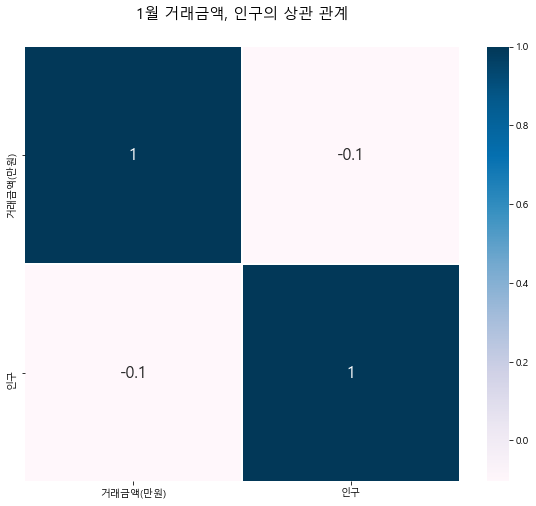

In [54]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("1월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data1.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

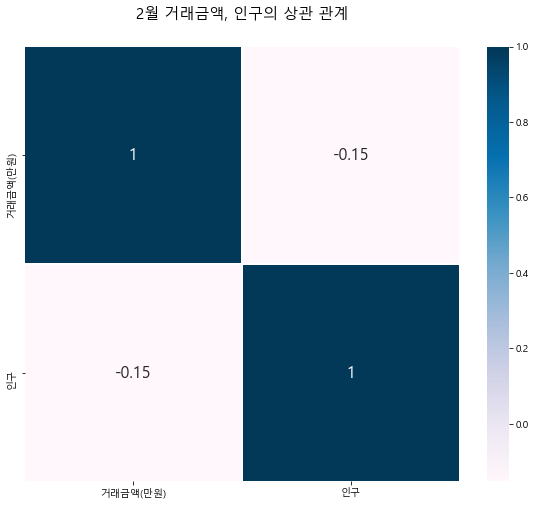

In [55]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("2월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data2.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

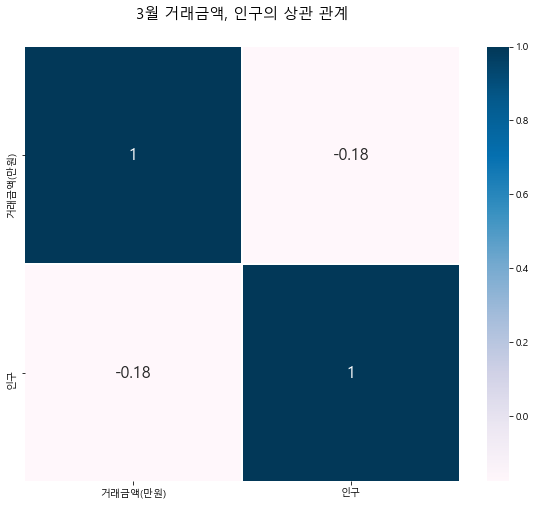

In [56]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("3월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data3.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

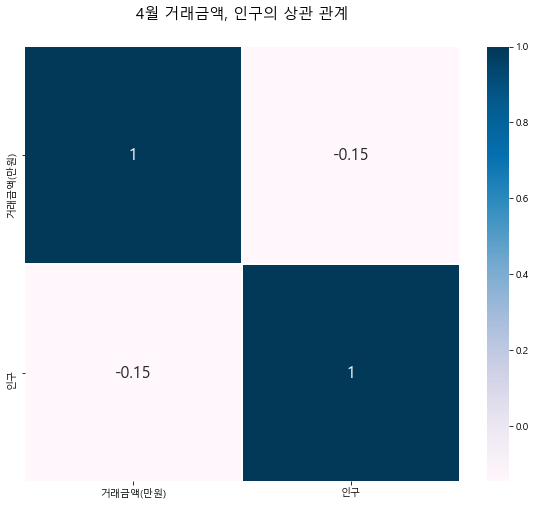

In [57]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("4월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data4.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

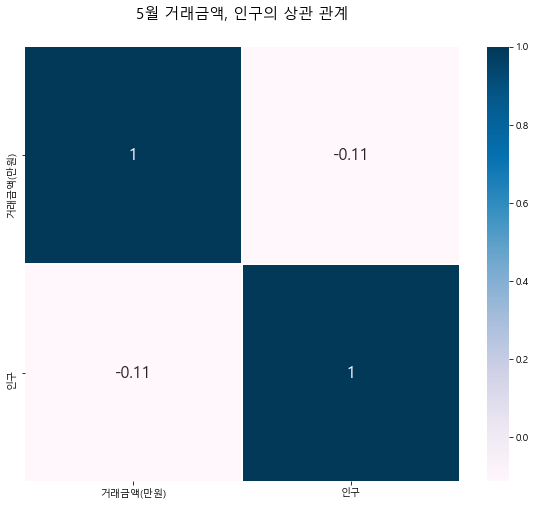

In [58]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("5월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data5.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

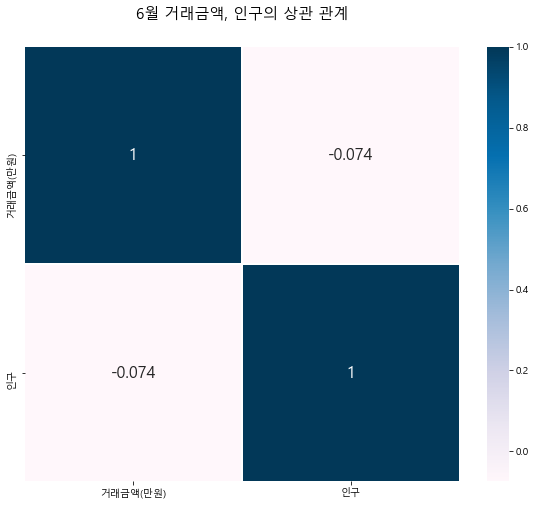

In [59]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("6월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data6.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

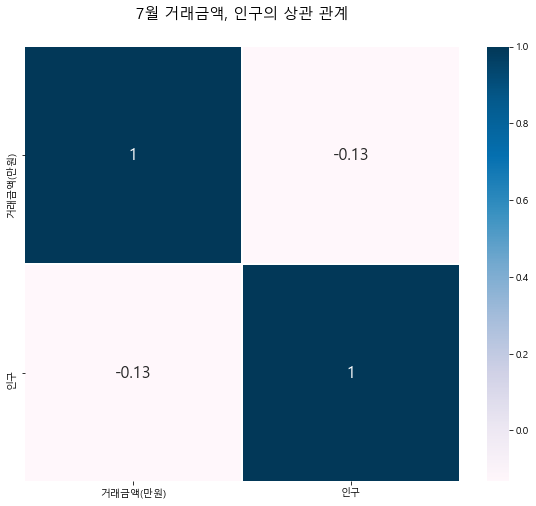

In [60]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("7월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data7.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

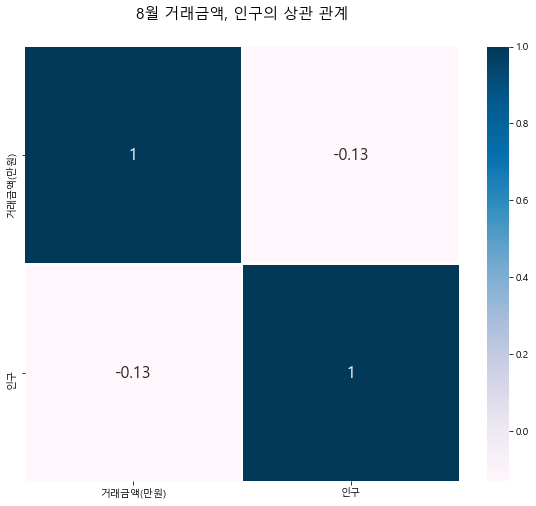

In [61]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("8월 거래금액, 인구의 상관 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data8.iloc[:,1:3].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [64]:
price_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도
9979,20220101,중구,신당동,18.0800,14000,2014.0
2623,20220101,구로구,구로동,38.9600,21000,1997.0
10018,20220101,중구,오장동,14.3700,25000,2020.0
4475,20220101,도봉구,창동,49.9400,75500,1990.0
7047,20220101,성동구,응봉동,75.5100,144000,1986.0
...,...,...,...,...,...,...
10136,20221031,중랑구,망우동,83.6100,50000,2002.0
1563,20221031,강서구,방화동,84.0164,38000,2002.0
9198,20221031,용산구,한강로1가,99.8500,160000,2005.0
9016,20221031,영등포구,영등포동4가,12.1000,12950,2012.0


In [65]:
population_df=pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수 합.csv")

In [116]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도명        3205 non-null   object
 1   시군구명       3205 non-null   object
 2   읍면동명       3205 non-null   object
 3   계          3205 non-null   int64 
 4   남자         3205 non-null   int64 
 5   여자         3205 non-null   int64 
 6   통계년월       3205 non-null   object
 7   만0-9세남자    3205 non-null   int64 
 8   만10-19세남자  3205 non-null   int64 
 9   만20-29세남자  3205 non-null   int64 
 10  만30-39세남자  3205 non-null   int64 
 11  만40-49세남자  3205 non-null   int64 
 12  만50-59세남자  3205 non-null   int64 
 13  만60-69세남자  3205 non-null   int64 
 14  만70세이상남자   3205 non-null   int64 
 15  만0-9세여자    3205 non-null   int64 
 16  만10-19세여자  3205 non-null   int64 
 17  만20-29세여자  3205 non-null   int64 
 18  만30-39세여자  3205 non-null   int64 
 19  만40-49세여자  3205 non-null   int64 
 20  만50-59세여자  3205 non-null   int

In [118]:
test = population_df[["읍면동명", "통계년월"]]

In [120]:
test["만0-9세"] = population_df["만0-9세남자"] + population_df["만0-9세여자"]
test["만10-19세"] = population_df["만10-19세남자"] + population_df["만10-19세여자"]
test["만20-29세"] = population_df["만20-29세남자"] + population_df["만20-29세여자"]
test["만30-39세"] = population_df["만30-39세남자"] + population_df["만30-39세여자"]
test["만40-49세"] = population_df["만40-49세남자"] + population_df["만40-49세여자"]
test["만50-59세"] = population_df["만50-59세남자"] + population_df["만50-59세여자"]
test["만60-69세"] = population_df["만60-69세남자"] + population_df["만60-69세여자"]
test["만70세이상"] = population_df["만70세이상남자"] + population_df["만70세이상여자"]

<ipython-input-120-acc21fdfde57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["만0-9세"] = population_df["만0-9세남자"] + population_df["만0-9세여자"]
<ipython-input-120-acc21fdfde57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["만10-19세"] = population_df["만10-19세남자"] + population_df["만10-19세여자"]
<ipython-input-120-acc21fdfde57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [132]:
test1=test[test["통계년월"]=="2022-01-31"]
test2=test[test["통계년월"]=="2022-01-31"]
test3=test[test["통계년월"]=="2022-03-31"]
test4=test[test["통계년월"]=="2022-04-30"]
test5=test[test["통계년월"]=="2022-05-31"]
test6=test[test["통계년월"]=="2022-06-30"]
test7=test[test["통계년월"]=="2022-07-31"]
test8=test[test["통계년월"]=="2022-08-22"]

In [134]:
join_df1=pd.merge(price_df1,test1,left_on="동",right_on="읍면동명",how='inner')
join_df2=pd.merge(price_df2,test2,left_on="동",right_on="읍면동명",how='inner')
join_df3=pd.merge(price_df3,test3,left_on="동",right_on="읍면동명",how='inner')
join_df4=pd.merge(price_df4,test4,left_on="동",right_on="읍면동명",how='inner')
join_df5=pd.merge(price_df5,test5,left_on="동",right_on="읍면동명",how='inner')
join_df6=pd.merge(price_df6,test6,left_on="동",right_on="읍면동명",how='inner')
join_df7=pd.merge(price_df7,test7,left_on="동",right_on="읍면동명",how='inner')
join_df8=pd.merge(price_df8,test8,left_on="동",right_on="읍면동명",how='inner')

In [135]:
join_df1

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도,읍면동명,통계년월,만0-9세,만10-19세,만20-29세,만30-39세,만40-49세,만50-59세,만60-69세,만70세이상
0,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-01-31,3493,4070,9813,10351,9772,12105,10576,9636
1,20220104,중구,신당동,14.080,16000,2016.0,신당동,2022-01-31,3493,4070,9813,10351,9772,12105,10576,9636
2,20220113,중구,신당동,59.420,23400,2001.0,신당동,2022-01-31,3493,4070,9813,10351,9772,12105,10576,9636
3,20220114,중구,신당동,38.530,15000,2001.0,신당동,2022-01-31,3493,4070,9813,10351,9772,12105,10576,9636
4,20220126,중구,신당동,59.370,20800,2001.0,신당동,2022-01-31,3493,4070,9813,10351,9772,12105,10576,9636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,20220126,서대문구,냉천동,84.930,90500,2002.0,냉천동,2022-01-31,246,256,356,443,501,565,370,294
1145,20220127,중구,묵정동,54.180,59500,1982.0,묵정동,2022-01-31,43,31,238,145,93,111,105,114
1146,20220128,영등포구,도림동,84.974,135000,2014.0,도림동,2022-01-31,865,918,2639,3152,2602,2926,2441,2184
1147,20220129,용산구,문배동,13.690,15500,2012.0,문배동,2022-01-31,601,352,756,1453,1050,724,477,306


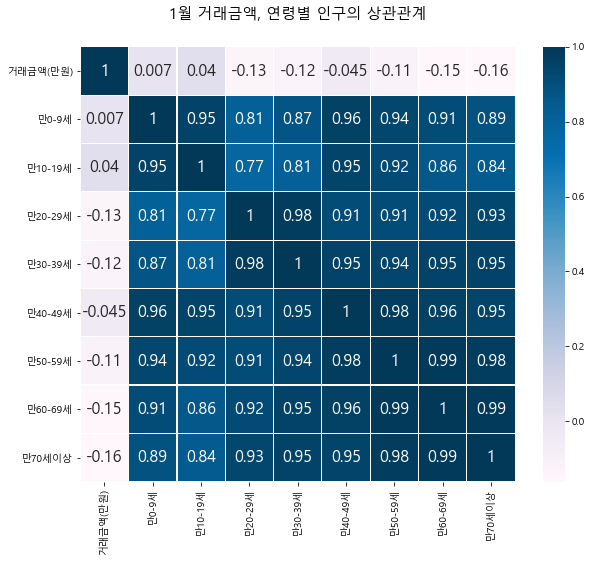

In [154]:
#위에랑 같이
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("1월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df1[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

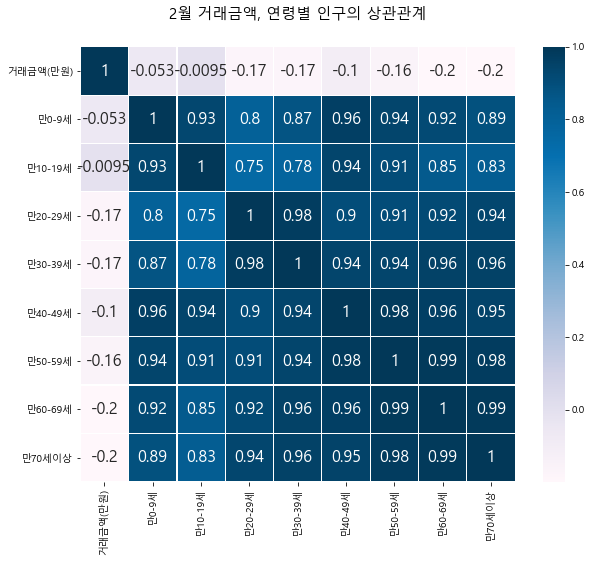

In [153]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("2월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df2[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


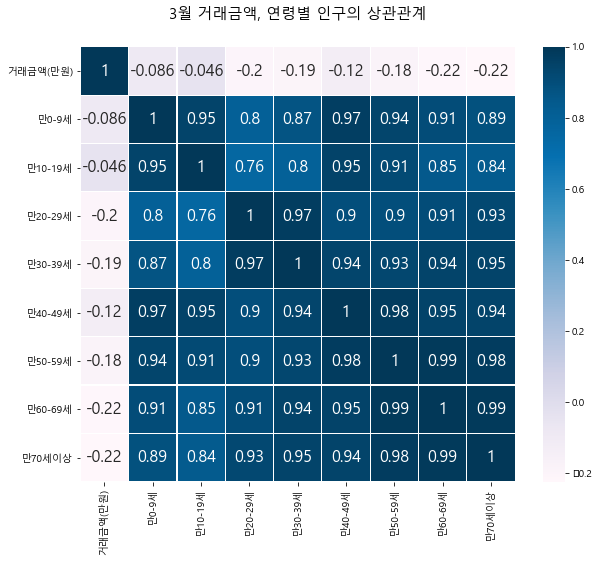

In [152]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("3월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df3[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


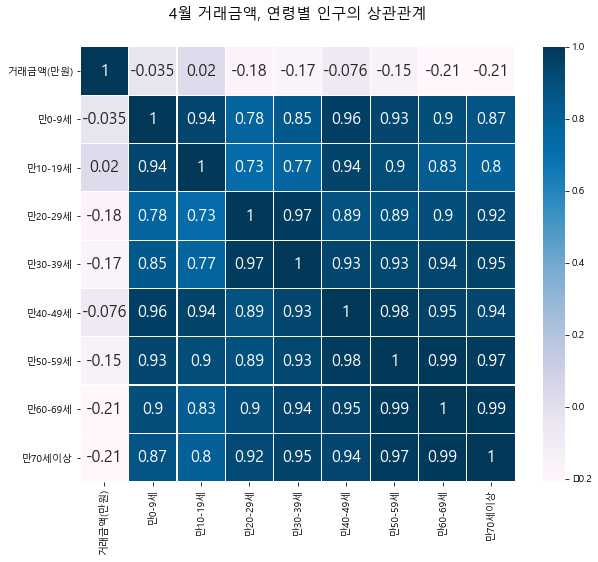

In [151]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("4월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df4[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

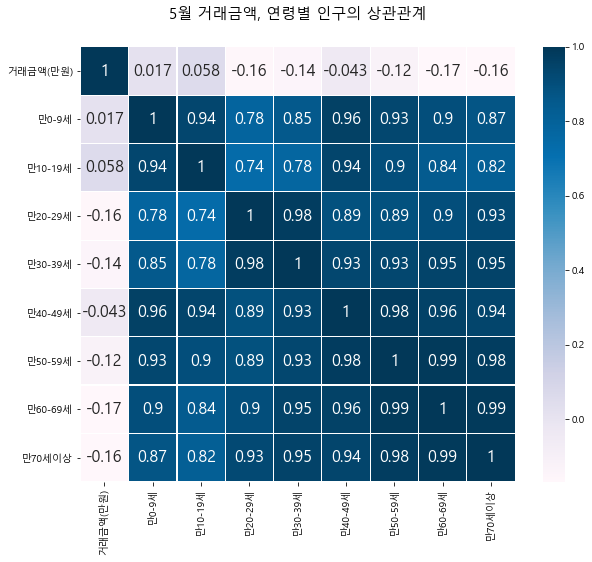

In [150]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("5월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df5[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

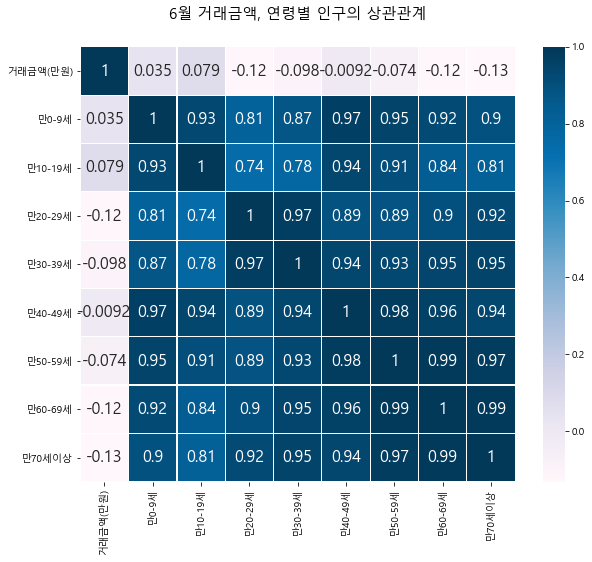

In [149]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("6월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df6[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

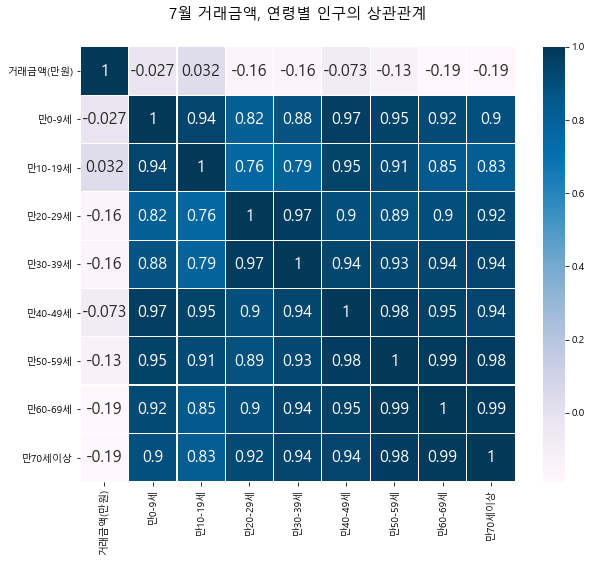

In [148]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("7월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df7[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

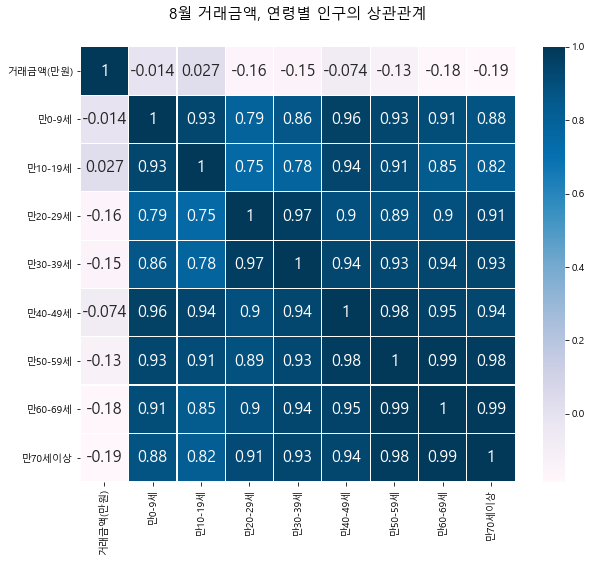

In [147]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("8월 거래금액, 연령별 인구의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df8[["거래금액(만원)", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [146]:
join_df=pd.merge(price_df,test,left_on="동",right_on="읍면동명",how='inner')
join_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도,읍면동명,통계년월,만0-9세,만10-19세,만20-29세,만30-39세,만40-49세,만50-59세,만60-69세,만70세이상
0,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-08-22,3390,3970,9516,10377,9522,11916,10548,9915
1,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-07-31,3381,3999,9549,10400,9592,11974,10540,9898
2,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-06-30,3405,4008,9584,10361,9624,11996,10513,9855
3,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-05-31,3417,4019,9616,10344,9646,12030,10521,9828
4,20220101,중구,신당동,18.080,14000,2014.0,신당동,2022-04-30,3431,4032,9672,10358,9683,12055,10547,9745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75571,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-06-30,44,65,187,158,148,174,103,112
75572,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-05-31,47,64,184,160,145,174,102,113
75573,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-04-30,47,65,180,161,152,170,102,115
75574,20220919,성북구,보문동4가,82.028,70000,2011.0,보문동4가,2022-03-31,44,65,185,159,152,172,105,115


C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


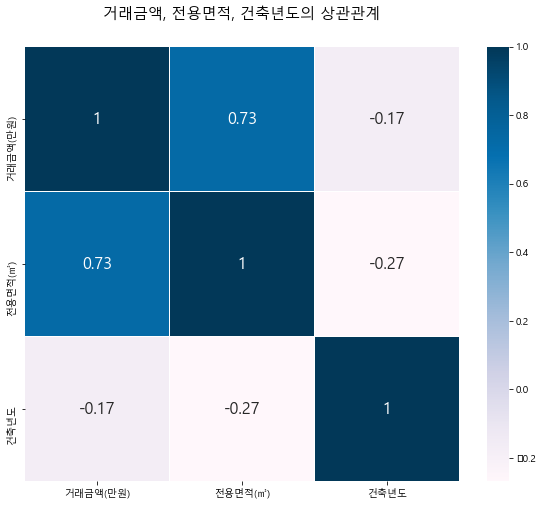

In [156]:
#전용면적 / 거래금액 / 건축연도의 상관관계
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("거래금액, 전용면적, 건축년도의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df[["거래금액(만원)", "전용면적(㎡)", "건축년도"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

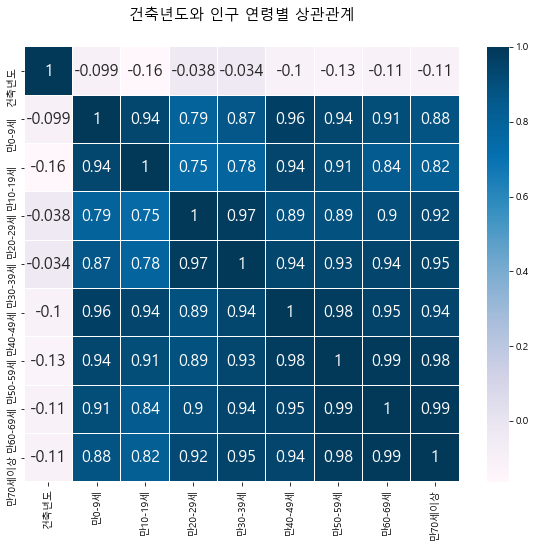

In [158]:
#건축년도와 인구 연령별 상관관계
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("건축년도와 인구 연령별 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df[["건축년도", "만0-9세", "만10-19세", "만20-29세", "만30-39세", "만40-49세", "만50-59세", "만60-69세", "만70세이상"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [162]:
#소멸위험지수와 건축년도, 면적간 상관관계
danger = pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수.csv")
danger["20-39여성"] = danger.iloc[:, 137:157].sum(axis=1)
danger["65세이상남자"] = danger.iloc[:, 71:117].sum(axis=1)
danger["65세이상여자"] = danger.iloc[:, 182:228].sum(axis=1)
danger["소멸위험지수"] = danger["20-39여성"] / (danger["65세이상남자"] + danger["65세이상여자"])
danger = danger[["시군구명", "읍면동명", "통계년월", "소멸위험지수"]]

In [167]:
danger = danger[danger["통계년월"] == '2022-08-22']

In [168]:
danger = danger[["읍면동명", "소멸위험지수"]]

In [169]:
join_df=pd.merge(price_df,danger,left_on="동",right_on="읍면동명",how='inner')
join_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),건축년도,읍면동명,소멸위험지수
0,20220101,중구,신당동,18.0800,14000,2014.0,신당동,0.700378
1,20220104,중구,신당동,14.0800,16000,2016.0,신당동,0.700378
2,20220113,중구,신당동,59.4200,23400,2001.0,신당동,0.700378
3,20220114,중구,신당동,38.5300,15000,2001.0,신당동,0.700378
4,20220126,중구,신당동,59.3700,20800,2001.0,신당동,0.700378
...,...,...,...,...,...,...,...,...
10786,20220808,중구,남대문로5가,116.1100,205000,2010.0,남대문로5가,0.159420
10787,20220812,영등포구,당산동6가,13.3867,16300,2012.0,당산동6가,2.691748
10788,20220819,영등포구,당산동6가,13.7067,16100,2012.0,당산동6가,2.691748
10789,20220830,영등포구,당산동6가,13.3867,16000,2012.0,당산동6가,2.691748


C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


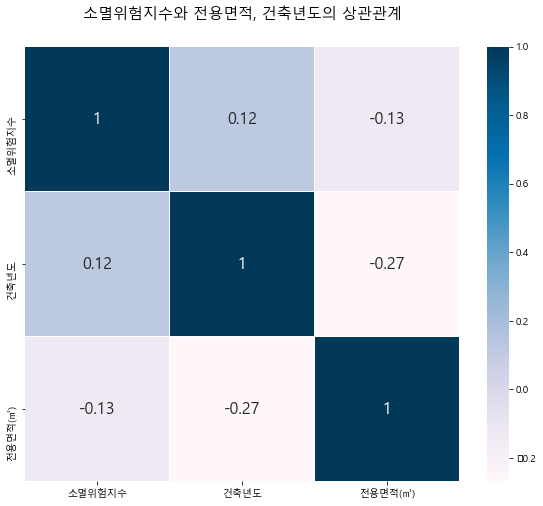

In [172]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("소멸위험지수와 전용면적, 건축년도의 상관관계", y = 1.05, size = 15)
sns.heatmap(join_df[["소멸위험지수", "건축년도", "전용면적(㎡)"]].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})